In [1]:
import pandas as pd
import numpy as np

In [10]:
vel01 = pd.read_csv('data/VDS_지점통행속도_5분_1일_20240601.csv',encoding='cp949')
vel01.head()

,집계일자,집계시분,VDS_ID,지점이정,차로유형구분코드,평균속도,Unnamed: 6
0,2024-06-01,00:00,0010VDE00100,1.4,1,83.26,NaN
1,2024-06-01,00:00,0010VDE00200,2.4,1,100.93,NaN
2,2024-06-01,00:00,0010VDE00300,3.3,1,92.78,NaN
3,2024-06-01,00:00,0010VDE00400,4.5,1,-1.00,NaN
4,2024-06-01,00:00,0010VDE00500,5.1,1,-1.00,NaN


In [9]:
dropIdx = vel01[(vel01['avgVel']==-1.00)].index
vel01 = vel01.drop(dropIdx)
vel01 = vel01.reset_index(drop=True)
vel01.head()

,time,VDS_ID,avgVel
0,00:00,0010VDE00100,83.26
1,00:00,0010VDE00200,100.93
2,00:00,0010VDE00300,92.78
3,00:00,0010VDE01200,90.43
4,00:00,0010VDE01300,87.87


In [61]:
vds = vel01['VDS_ID'].unique()
print(len(vds))
vds

6066


array(['0010VDE00100', '0010VDE00200', '0010VDE00300', ...,
       '0010VDE08101', '0321VDE00700', '0321VDS00700'], dtype=object)

In [62]:
mins = vel01['집계시분'].unique()
print(len(mins))

288


In [63]:
temp = vel01.groupby('VDS_ID')['집계시분'].count().reset_index()
temp

,VDS_ID,집계시분
0,0010VDE00100,288
1,0010VDE00200,288
2,0010VDE00300,288
3,0010VDE01200,288
4,0010VDE01300,288
...,...,...
6061,6000VDS03100,288
6062,6000VDS03200,288
6063,6000VDS03300,288
6064,6000VDS03400,288


In [64]:
dropId = []
for idx, row in temp.iterrows():
    if row['집계시분']!=288:
        dropId.append(row['VDS_ID'])
dropId[:5]

['0010VDE04340',
 '0010VDE08101',
 '0010VDE16700',
 '0010VDE19000',
 '0010VDE21400']

In [65]:
vel01.set_index('VDS_ID', inplace=True)

In [66]:
vel01.head()

,집계시분,평균속도
VDS_ID,,
0010VDE00100,00:00,83.26
0010VDE00200,00:00,100.93
0010VDE00300,00:00,92.78
0010VDE01200,00:00,90.43
0010VDE01300,00:00,87.87


In [67]:
vel01 = vel01.drop(index=dropId)

In [68]:
vel01 = vel01.reset_index()
vds = vel01['VDS_ID'].unique()
print(len(vds))
vds

4611


array(['0010VDE00100', '0010VDE00200', '0010VDE00300', ...,
       '6000VDS03300', '6000VDS03400', '6000VDS03500'], dtype=object)

In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [71]:
vel01['시간'] = vel01['집계시분'].apply(lambda x: int(x.split(':')[0])+int(x.split(':')[1])/60)
vel01['시간'] = vel01['시간'].apply(lambda x: round(x,1))
vel01.head()

,VDS_ID,집계시분,평균속도,시간
0,0010VDE00100,00:00,83.26,0.0
1,0010VDE00200,00:00,100.93,0.0
2,0010VDE00300,00:00,92.78,0.0
3,0010VDE01200,00:00,90.43,0.0
4,0010VDE01300,00:00,87.87,0.0


In [ ]:
nrows = 100
ncols = 3
startIdx = 0
figNumMax = len(vds)//(nrows*ncols)

for n in range(figNumMax):
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)
    fig.set_size_inches(12, nrows*2)
    plt.tight_layout()
    for i in range(nrows):
        for j in range(ncols):
            axs[i][j].plot(vel01[vel01['VDS_ID']==vds[startIdx]]['시간'], vel01[vel01['VDS_ID']==vds[startIdx]]['평균속도'], '.-')
            axs[i][j].set_title(startIdx)
            plt.xticks([]) # disable xticks
            startIdx += 1
    # plt.show()
    fig.savefig("vel0601_{n}.png".format(n=n))

In [74]:
vel01.head()

,VDS_ID,집계시분,평균속도,시간
0,0010VDE00100,00:00,83.26,0.0
1,0010VDE00200,00:00,100.93,0.0
2,0010VDE00300,00:00,92.78,0.0
3,0010VDE01200,00:00,90.43,0.0
4,0010VDE01300,00:00,87.87,0.0


In [75]:
vel01 = vel01.sort_values(by=['VDS_ID','집계시분'],ignore_index=True)
vel01.head()

,VDS_ID,집계시분,평균속도,시간
0,0010VDE00100,00:00,83.26,0.0
1,0010VDE00100,00:05,84.60,0.1
2,0010VDE00100,00:10,88.46,0.2
3,0010VDE00100,00:15,86.53,0.2
4,0010VDE00100,00:20,93.66,0.3


In [80]:
# min-max standarization(0-1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vel01['scaled_vel'] = scaler.fit_transform(vel01[['평균속도']])
vel01.head()

,VDS_ID,집계시분,평균속도,시간,scaled_vel
0,0010VDE00100,00:00,83.26,0.0,0.475491
1,0010VDE00100,00:05,84.60,0.1,0.483237
2,0010VDE00100,00:10,88.46,0.2,0.505549
3,0010VDE00100,00:15,86.53,0.2,0.494393
4,0010VDE00100,00:20,93.66,0.3,0.535607


In [92]:
# transform the data to make train/test sets
scaled_vel = scaler.fit_transform(vel01[['평균속도']])
data = []
for i in range(len(vds)):
    data.append(scaled_vel[288*i:288*(i+1)])

In [96]:
np.shape(data)

(4611, 288, 1)

In [98]:
data = np.array(data)
data = data.reshape(4611,288)
np.shape(data)

(4611, 288)

In [102]:
# find the best k for K-Means alg
from sklearn.cluster import KMeans
inertia = []
for k in range(5,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    inertia.append(km.inertia_)

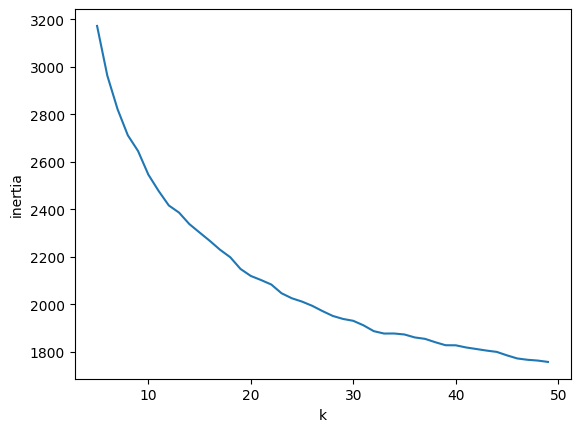

In [103]:
# find an elbow
plt.plot(range(5,50),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

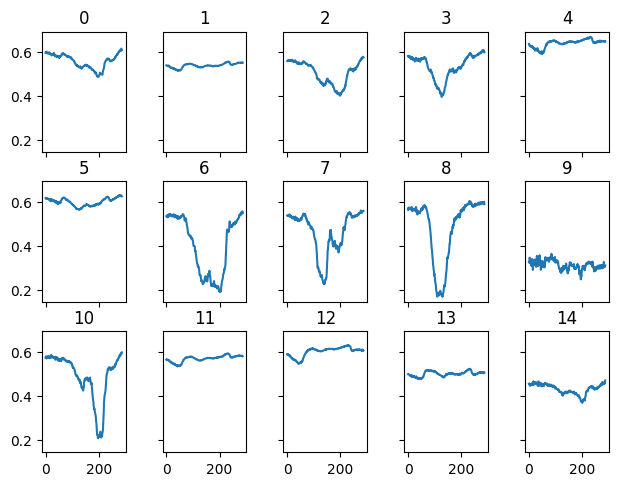

In [118]:
# try k=15
km15 = KMeans(n_clusters=15, random_state=42)
km15.fit(data)
# draw cluster centers
row = 3
col = 5
fig, axs = plt.subplots(row,col,sharex=True, sharey=True)
plt.tight_layout()
for i in range(row):
    for j in range(col):
        axs[i][j].plot(range(len(km15.cluster_centers_[col*i+j])), km15.cluster_centers_[col*i+j])
        axs[i][j].set_title(col*i+j)

well 1, 4, 11 and 12 seem to have more or less the same pattern, yet with slightly different magnitude.
so better shift the plots upwards so that each maximum is set to one

In [126]:
# function to draw figures with 5 column
def draw_pattern(arr):
    row = int(np.ceil(len(arr)/5))
    col = 5
    fig, axs = plt.subplots(row,col,sharex=True, sharey=True)
    plt.tight_layout()
    for i in range(row):
        for j in range(col):
            if i*col + j < len(arr):
                axs[i][j].plot(range(len(arr[col*i+j])), arr[col*i+j])
                axs[i][j].set_title(col*i+j)

In [ ]:
draw_pattern(km15.cluster_centers_)

In [132]:
# apply minmax standarization for each
data = []
for i in range(len(vds)):
    data.append(vel01['평균속도'].values[288*i:288*(i+1)])
data[0]

array([83.26, 84.6 , 88.46, 86.53, 93.66, 81.38, 87.07, 84.27, 89.16,
       85.93, 85.89, 78.45, 88.91, 85.94, 88.91, 90.32, 80.71, 89.94,
       89.78, 87.72, 95.11, 82.33, 87.05, 84.33, 85.93, 80.21, 87.04,
       85.25, 91.29, 86.81, 75.96, 88.45, 81.62, 90.3 , 85.99, 79.79,
       76.6 , 85.55, 81.61, 81.81, 74.5 , 75.87, 82.86, 80.56, 84.18,
       80.88, 85.63, 90.22, 78.63, 87.08, 82.36, 83.01, 83.88, 83.3 ,
       77.52, 83.58, 81.65, 84.36, 84.52, 84.42, 84.08, 84.62, 85.64,
       86.  , 92.36, 88.45, 87.97, 89.96, 86.54, 87.55, 82.5 , 88.06,
       85.97, 86.45, 82.96, 89.11, 83.84, 84.95, 83.61, 84.07, 85.59,
       84.01, 81.07, 85.68, 86.05, 83.89, 83.46, 83.03, 84.05, 86.94,
       85.98, 85.69, 86.33, 88.04, 86.06, 85.29, 85.07, 86.77, 84.59,
       83.9 , 85.23, 84.5 , 83.97, 83.45, 81.08, 85.27, 81.28, 81.76,
       82.11, 83.24, 82.74, 80.02, 81.85, 81.02, 79.54, 79.35, 80.72,
       84.68, 81.7 , 79.91, 78.07, 79.2 , 79.96, 79.91, 78.07, 79.09,
       78.99, 74.82,

In [139]:
data = np.array(data)
data = data.reshape(4611,288)
np.shape(data)[0]

4611

In [144]:
scaled_data = []
scaler = MinMaxScaler()
scaled_data.append(scaler.fit_transform(data[0].reshape(-1,1)))

In [148]:
scaled_data = []
for i in range(np.shape(data)[0]):
    scaler = MinMaxScaler()
    scaled_data.append(scaler.fit_transform(data[i].reshape(-1,1)))
np.shape(scaled_data)
scaled_data = np.array(scaled_data)
scaled_data = scaled_data.reshape(4611,288)

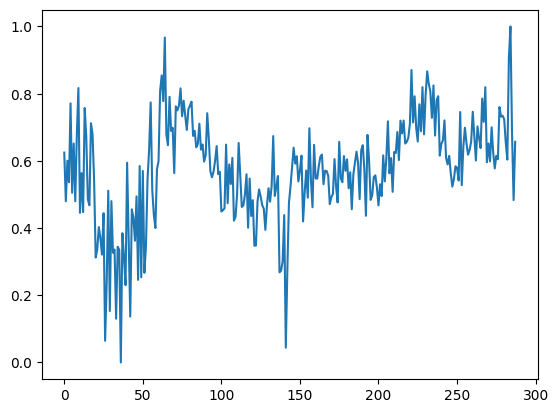

In [170]:
plt.plot(range(len(scaled_data[100])),scaled_data[100])

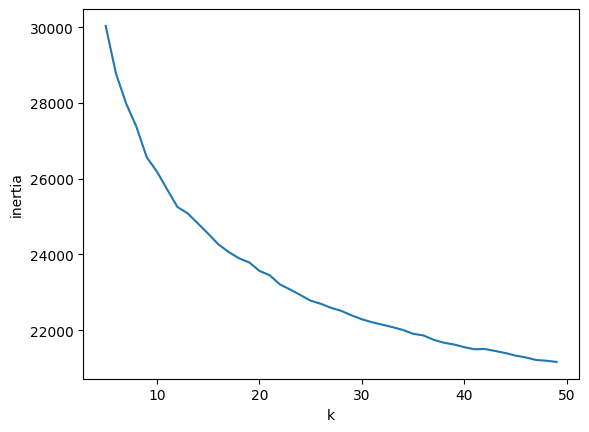

In [150]:
inertia = []
for k in range(5,50):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)
    
# find an elbow
plt.plot(range(5,50),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

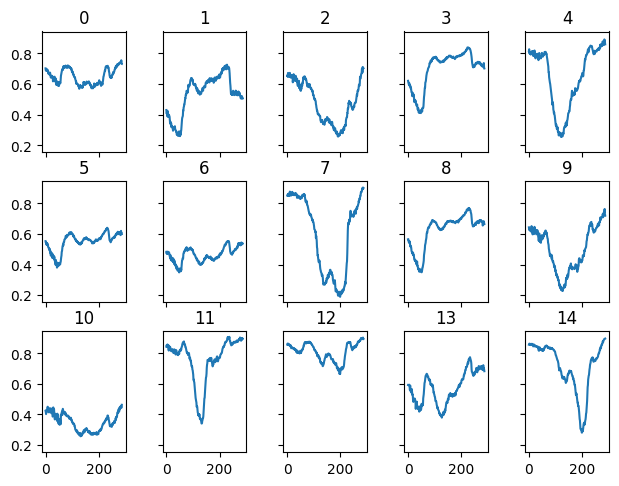

In [151]:
# try k=15
km15 = KMeans(n_clusters=15, random_state=42)
km15.fit(scaled_data)
# draw cluster centers
row = 3
col = 5
fig, axs = plt.subplots(row,col,sharex=True, sharey=True)
plt.tight_layout()
for i in range(row):
    for j in range(col):
        axs[i][j].plot(range(len(km15.cluster_centers_[col*i+j])), km15.cluster_centers_[col*i+j])
        axs[i][j].set_title(col*i+j)

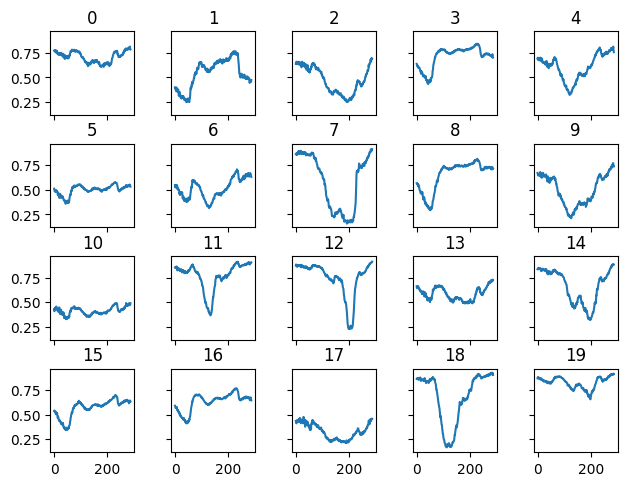

In [173]:
# try k=20
km20 = KMeans(n_clusters=20, random_state=42)
km20.fit(scaled_data)
# draw cluster centers
row = 4
col = 5
fig, axs = plt.subplots(row,col,sharex=True, sharey=True)
plt.tight_layout()
for i in range(row):
    for j in range(col):
        axs[i][j].plot(range(len(km20.cluster_centers_[col*i+j])), km20.cluster_centers_[col*i+j])
        axs[i][j].set_title(col*i+j)

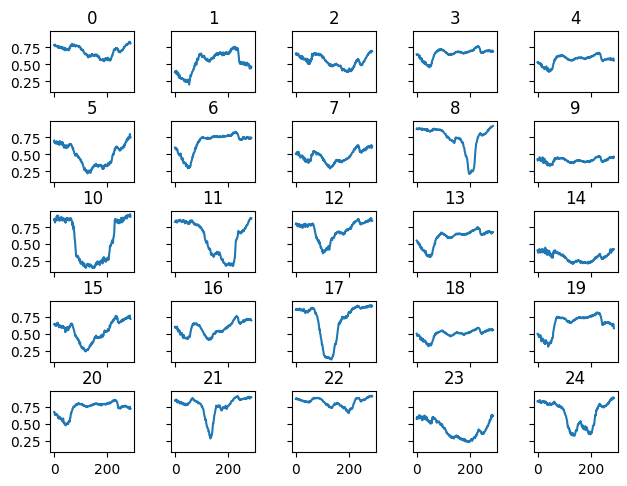

In [176]:
# try k=25
km25 = KMeans(n_clusters=25, random_state=42)
km25.fit(scaled_data)
# draw cluster centers
draw_pattern(km25.cluster_centers_)